<h1>Rol de las capas ocultas</h1>
<p>a) Generar el dataset, con 500 muestras, extraidas desde la funcion make_moons, predefinida en datasets de sklearn</p>

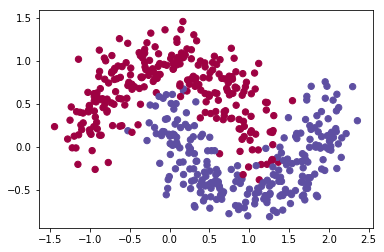

In [18]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegressionCV
X, y = make_moons(n_samples=500, noise=0.2)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()


b) Red con una capa oculta: Se define el modelo, con 2 dimensiones de entrada y dos dimensiones de salida. 

loss en iteración 0:0.617485578879
loss en iteración 1000:0.357581334755
loss en iteración 2000:0.357581334755
loss en iteración 3000:0.357581334755
loss en iteración 4000:0.357581334755
loss en iteración 5000:0.357581334755
loss en iteración 6000:0.357581334755
loss en iteración 7000:0.357581334755
loss en iteración 8000:0.357581334755
loss en iteración 9000:0.357581334755


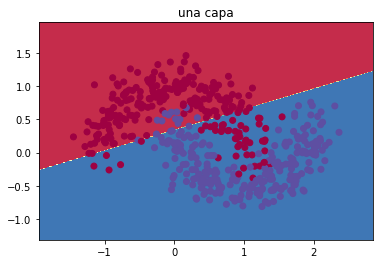

In [39]:
#########################################################################################
#Funcion que ayuda a graficar el resultado
def plot_decision_boundary(pred_func):
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
   
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    
#########################################################################################

numejemplos = len(X) # cantidad de lunas
dimEntrada = 2 # 2 dimensiones, espacio cartesiano
dimSalida = 2 # 2 dimensiones rojo.azul
 
# parametros del gradiente descendente
epsilon = 0.01 # cuanto se mueve el gradiente


# esta funcion aprende los parametros para la red y devuelve el modelo 
# - nn_hdim: numero de nodos en la capa oculta
# - num_passes: pasos de datos de entrenamiento al gradiente
# - print_loss: imprime loss cada 1000 iteraciones
def modelo(capas, numentrenamiento=10000):
     
    # iniciar parametros aleatorios
    np.random.seed(0)
    W1 = np.random.randn(dimEntrada, capas) / np.sqrt(dimEntrada)
    b1 = np.zeros((1, capas))
    W2 = np.random.randn(capas, dimSalida) / np.sqrt(capas)
    b2 = np.zeros((1, dimSalida))
 
    # retorno
    model = {}
     
    # Gradiente para cada muestra
    for i in range(0, numentrenamiento):
 
        # Forward pass , probs viene de softmax
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
 
        # Backpropagation
        delta3 = probs
        delta3[range(numejemplos), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
 
 
        # actualizar pesos
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
         
        # asignar nuevosparametros al modelo 
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        if (i%1000 == 0):
            print ("loss en iteración "+str(i)+":" + str(loss(model)))
            
    return model

# construir modelo con 1 capas 
model = modelo(1)
 
# graficar
plot_decision_boundary(lambda x: predict(model, x))
plt.title("una capa")


plt.show()

In [ ]:
c) Red con n capas ocultas

loss en iteración 0:0.355012425962
loss en iteración 1000:0.081838000011
loss en iteración 2000:0.0795326339238
loss en iteración 3000:0.0786593219294
loss en iteración 4000:0.0782352963744
loss en iteración 5000:0.0780052805535
loss en iteración 6000:0.0778730075827
loss en iteración 7000:0.0777944074687
loss en iteración 8000:0.0777468090366
loss en iteración 9000:0.0777176638009


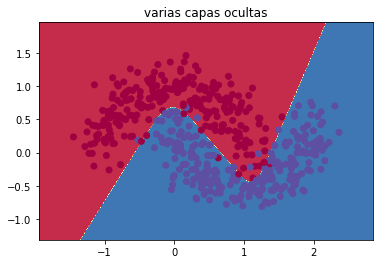

In [40]:

# construir modelo con n capas 
model = modelo(3)
 
# graficar
plot_decision_boundary(lambda x: predict(model, x))
plt.title("varias capas ocultas")


plt.show()

Funcion de perdida:
    

In [34]:
def loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation - softmax
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # perdida logaritmo de softmax
    logprobs = -np.log(probs[range(num_examples), y])
    #suma de logaritmos obtenidos
    lossValues = np.sum(logprobs)
   
    return 1./num_examples * lossValues